In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 이미지 각도 30도
gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.3,
                      shear_range=0.4, horizontal_flip=True)

In [3]:
img_array_list=[]
img_names=['data/dog1.jpg','data/dog2.jpg','data/cat1.jpg','data/cat2.jpg']
print(img_names)

['data/dog1.jpg', 'data/dog2.jpg', 'data/cat1.jpg', 'data/cat2.jpg']


In [4]:
for i in range(len(img_names)):
    loaded_img=image.load_img(img_names[i],target_size=(100,100))
    loaded_img_array=img_to_array(loaded_img)/255.0 # 정규화
    img_array_list.append(loaded_img_array)
img_array_list[0]

array([[[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.9882353 , 0.9607843 , 0.9372549 ],
        [0.9843137 , 0.972549  , 0.9529412 ],
        [0.9843137 , 0.972549  , 0.9529412 ]],

       [[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.98039216, 0.96862745, 0.9411765 ],
        [0.9843137 , 0.972549  , 0.94509804],
        [0.98039216, 0.96862745, 0.9411765 ]],

       [[0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.9098039 , 0.87058824],
        ...,
        [0.9843137 , 0.9647059 , 0.9411765 ],
        [0.9843137 , 0.95686275, 0.93333334],
        [0.9843137 , 0.95686275, 0.93333334]],

       ...,

       [[0.9411765 , 0.9372549 , 0.92156863],
        [0.9411765 , 0.9372549 , 0.92156863],
        [0.9529412 , 0

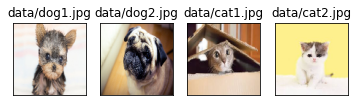

In [5]:
plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):
    plt.subplot(1,len(img_array_list),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [6]:
batch_size=4
data_gen=gen.flow(np.array(img_array_list),batch_size=batch_size)

In [7]:
img=data_gen.next()

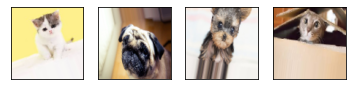

In [8]:
plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [9]:
gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.3,
                      shear_range=0.4, rescale=1./255)

In [10]:
data_path = 'data/test_dir/'
batch_size = 12

In [11]:
data_gen = gen.flow_from_directory(directory=data_path,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  target_size=(100,100),
                                  class_mode='categorical')

Found 12 images belonging to 3 classes.


In [12]:
img, label = data_gen.next()
print(len(img))

12


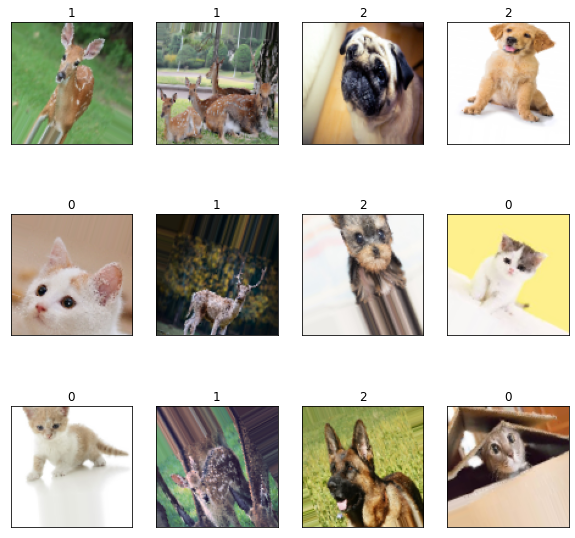

In [13]:
plt.figure(figsize=(10,10))
for i in range(len(img)):
    plt.subplot(3,4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])